## Libraries

In [745]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import sklearn.metrics as metric
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import shap


## Data

In [746]:
df_control = pd.read_csv('control_data.csv')

df_control.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
21,"Sat, Nov 1",8460,681,156.0,93.0
14,"Sat, Oct 25",8687,691,176.0,128.0
32,"Wed, Nov 12",10134,801,NaN,NaN
7,"Sat, Oct 18",7434,632,110.0,70.0
20,"Fri, Oct 31",8890,706,174.0,101.0
30,"Mon, Nov 10",10419,874,NaN,NaN
6,"Fri, Oct 17",9008,748,146.0,76.0
34,"Fri, Nov 14",9192,735,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
3,"Tue, Oct 14",9871,836,156.0,105.0


In [747]:
df_exp = pd.read_csv('experiment_data.csv')

df_exp.sample(10)

,Date,Pageviews,Clicks,Enrollments,Payments
34,"Fri, Nov 14",9304,770,NaN,NaN
36,"Sun, Nov 16",8988,710,NaN,NaN
16,"Mon, Oct 27",9655,771,213.0,119.0
2,"Mon, Oct 13",10480,884,145.0,79.0
28,"Sat, Nov 8",8969,760,NaN,NaN
27,"Fri, Nov 7",9272,767,NaN,NaN
25,"Wed, Nov 5",9633,808,NaN,NaN
22,"Sun, Nov 2",8836,724,182.0,103.0
14,"Sat, Oct 25",8669,669,127.0,81.0
5,"Thu, Oct 16",9500,788,129.0,61.0


In [748]:
#add exp_id column to indicate wheather data is from control or experiment df
df_control['exp_id'] = 0

df_exp['exp_id'] = 1

In [749]:
# combine data
df = pd.concat([df_control, df_exp], axis=0).reset_index(drop=True)

df

,Date,Pageviews,Clicks,Enrollments,Payments,exp_id
0,"Sat, Oct 11",7723,687,134.0,70.0,0
1,"Sun, Oct 12",9102,779,147.0,70.0,0
2,"Mon, Oct 13",10511,909,167.0,95.0,0
3,"Tue, Oct 14",9871,836,156.0,105.0,0
4,"Wed, Oct 15",10014,837,163.0,64.0,0
...,...,...,...,...,...,...
69,"Wed, Nov 12",10042,802,NaN,NaN,1
70,"Thu, Nov 13",9721,829,NaN,NaN,1
71,"Fri, Nov 14",9304,770,NaN,NaN,1
72,"Sat, Nov 15",8668,724,NaN,NaN,1


## Data Cleaning

In [750]:
df.dtypes

Date            object
Pageviews        int64
Clicks           int64
Enrollments    float64
Payments       float64
exp_id           int64
dtype: object

Date is an Object type - convert to date type - slice day 

In [751]:
df['dow']= df['Date'].str.split(',').str[0]

df

,Date,Pageviews,Clicks,Enrollments,Payments,exp_id,dow
0,"Sat, Oct 11",7723,687,134.0,70.0,0,Sat
1,"Sun, Oct 12",9102,779,147.0,70.0,0,Sun
2,"Mon, Oct 13",10511,909,167.0,95.0,0,Mon
3,"Tue, Oct 14",9871,836,156.0,105.0,0,Tue
4,"Wed, Oct 15",10014,837,163.0,64.0,0,Wed
...,...,...,...,...,...,...,...
69,"Wed, Nov 12",10042,802,NaN,NaN,1,Wed
70,"Thu, Nov 13",9721,829,NaN,NaN,1,Thu
71,"Fri, Nov 14",9304,770,NaN,NaN,1,Fri
72,"Sat, Nov 15",8668,724,NaN,NaN,1,Sat


In [752]:
#Check for NaN values
df.isna().sum()

Date            0
Pageviews       0
Clicks          0
Enrollments    28
Payments       28
exp_id          0
dow             0
dtype: int64

In [753]:
# Remove rows with NaN values
df.dropna(inplace=True)

df

,Date,Pageviews,Clicks,Enrollments,Payments,exp_id,dow
0,"Sat, Oct 11",7723,687,134.0,70.0,0,Sat
1,"Sun, Oct 12",9102,779,147.0,70.0,0,Sun
2,"Mon, Oct 13",10511,909,167.0,95.0,0,Mon
3,"Tue, Oct 14",9871,836,156.0,105.0,0,Tue
4,"Wed, Oct 15",10014,837,163.0,64.0,0,Wed
5,"Thu, Oct 16",9670,823,138.0,82.0,0,Thu
6,"Fri, Oct 17",9008,748,146.0,76.0,0,Fri
7,"Sat, Oct 18",7434,632,110.0,70.0,0,Sat
8,"Sun, Oct 19",8459,691,131.0,60.0,0,Sun
9,"Mon, Oct 20",10667,861,165.0,97.0,0,Mon


In [754]:
# Remove date and payment as they are not relevant
df = df.drop(columns=['Date', 'Payments'])

In [755]:
#Sort data columns

df = df[['exp_id', 'Pageviews', 'Clicks', 'dow', 'Enrollments']]

df.head()

,exp_id,Pageviews,Clicks,dow,Enrollments
0,0,7723,687,Sat,134.0
1,0,9102,779,Sun,147.0
2,0,10511,909,Mon,167.0
3,0,9871,836,Tue,156.0
4,0,10014,837,Wed,163.0


### Encode Data

In [756]:
# Since label encoder does not allow to order the data we are going to use map
day_order = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

df['dow'] = df['dow'].map(day_order)

df.head()

,exp_id,Pageviews,Clicks,dow,Enrollments
0,0,7723,687,5,134.0
1,0,9102,779,6,147.0
2,0,10511,909,0,167.0
3,0,9871,836,1,156.0
4,0,10014,837,2,163.0


## ML Modeling

### Test Train Split

In [757]:
X = df.drop(columns=['Enrollments'])
y = df['Enrollments']

In [758]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X['dow'], random_state=42)

### Residual Plot Functions

In [759]:
def residual_plot(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10,5))
    plt.scatter(y_test, residuals, alpha=0.5, color="black")
    plt.xlabel("Enrollments")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title("Residual Plot ({})".format(model_name))
    plt.show()

In [760]:
def plot_pred(y_test, y_pred, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N + 1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N + 1), y_pred, c='red')
    plt.yticks(np.arange(0, max(y_test) + 100, 50))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    plt.title('True labels vs. Predicted Labels ({})'.format(model_name))
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

### Linear Regression - Baseline

In [761]:
X_train_lr = sm.add_constant(X_train)

In [762]:
## Train model
model_lr = sm.OLS(y_train, X_train_lr).fit()

In [763]:
X_test_lr = sm.add_constant(X_test)

In [764]:
## prediction on test
y_pred_lr = model_lr.predict(X_test_lr)

In [765]:
print('For Linear Regression:')
print(f'MSE   : {metric.mean_squared_error(y_test, y_pred_lr):.3f}')
print(f'R2    : {metric.r2_score(y_test, y_pred_lr):.3f}')
print(f'MAE   : {metric.mean_absolute_error(y_test, y_pred_lr):.3f}')

For Linear Regression:
MSE   : 416.098
R2    : 0.638
MAE   : 17.250


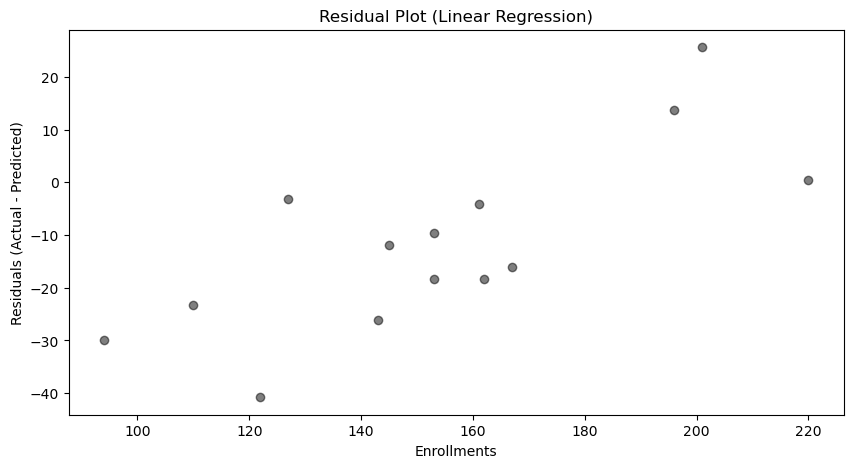

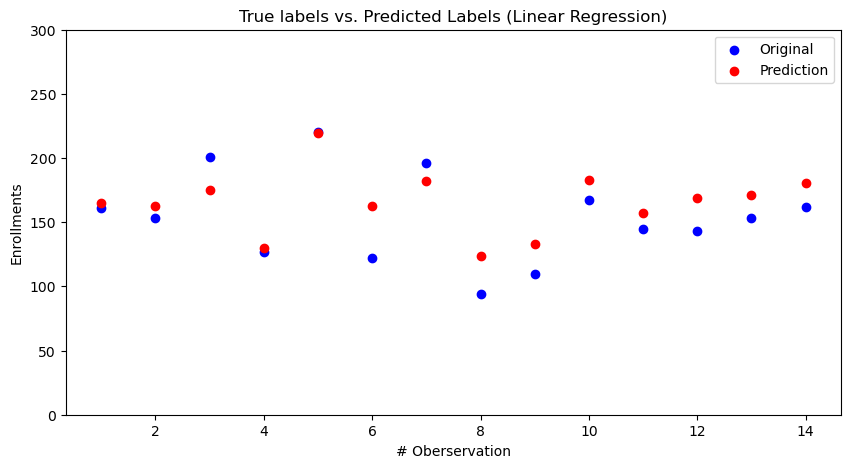

In [766]:
residual_plot(y_test, y_pred_lr, 'Linear Regression')
plot_pred(y_test, y_pred_lr, 'Linear Regression')

In [767]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Enrollments   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     5.026
Date:                Tue, 29 Apr 2025   Prob (F-statistic):            0.00369
Time:                        15:46:06   Log-Likelihood:                -146.34
No. Observations:                  32   AIC:                             302.7
Df Residuals:                      27   BIC:                             310.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.5055     96.306      1.147      0.261     -87.097     308.108
exp_id       -10.2003      9.261     -1.101      0.280     -29.202       8.801
Pageviews      0.0534      0.016      3.362      0.002       0.021       0.086
Clicks        -0.5686      0.157     -3.612      0.001      -0.892      -0.246
dow           -2.9282      3.466     -0.845      0.406     -10.040       4.184
==============================================================================
Omnibus:                        0.918   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.897
Skew:                           0.226   Prob(JB):                        0.638
Kurtosis:                       2.316   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#p-value effect
#Pageviews (p = 0.000) → Highly significant, positively impacting enrollments.
#Clicks (p = 0.000) → Highly significant, but negatively correlated with enrollments (possible issue?).
#exp_id (p = 0.068) → Marginally significant, suggests that being in a different experimental group may lower enrollments.
#dow (p = 0.293) → Not significant, meaning the day of the week doesn’t strongly affect enrollments.

#coefficients (Effect size)
#Pageviews (0.0597) → More pageviews increase enrollments.
#Clicks (-0.5506) → More clicks decrease enrollments (unexpected; could suggest low-quality clicks or a misleading CTA).
#exp_id (-15.5001) → Experimental condition might be negatively affecting enrollments.
#dow (-2.2699) → Affects enrollments slightly, but not significantly.

One interesting observation: Test accuracy drops if not test_train split is not stratified as per dow

### Decision Tree model

In [768]:
model_dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)
model_dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)

In [769]:
y_pred_dtree = model_dtree.predict(X_test)

In [770]:
print('For Decision Tree:')
print(f'MSE   : {metric.mean_squared_error(y_test, y_pred_dtree):.3f}')
print(f'R2    : {metric.r2_score(y_test, y_pred_dtree):.3f}')
print(f'MAE   : {metric.mean_absolute_error(y_test, y_pred_dtree):.3f}')

For Decision Tree:
MSE   : 442.281
R2    : 0.615
MAE   : 17.661


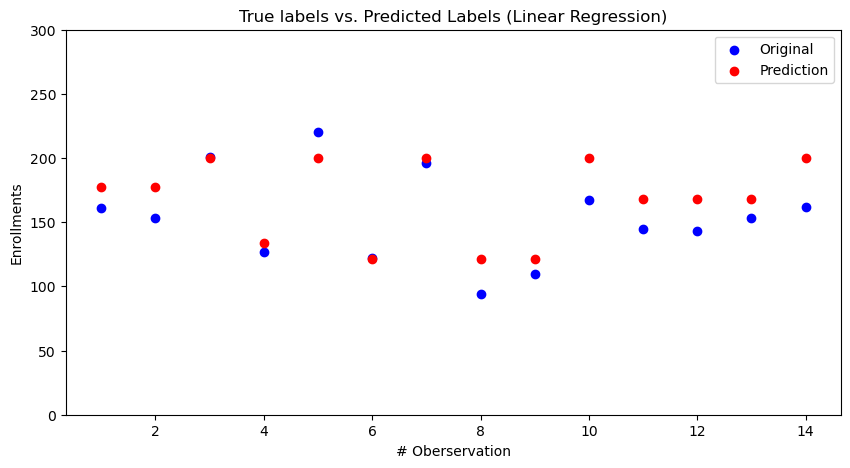

In [771]:
plot_pred(y_test, y_pred_dtree, 'Linear Regression')

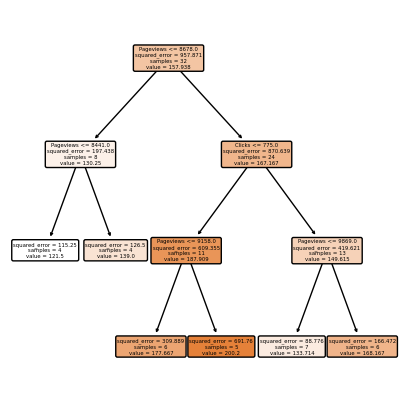

In [772]:
from sklearn.tree import plot_tree

plt.figure(figsize=(5, 5))
plot_tree(model_dtree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

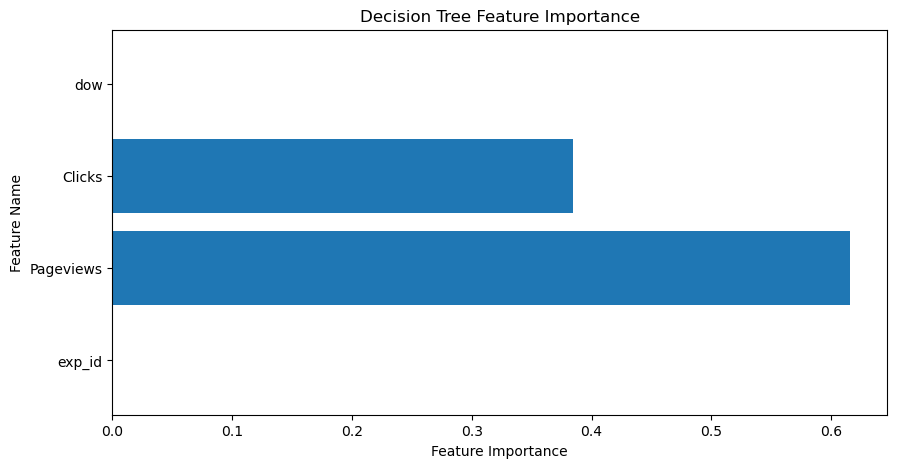

In [773]:
importances_dtree = model_dtree.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10,5))
plt.barh(feature_names, importances_dtree)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Decision Tree Feature Importance")
plt.show()


### XGBoost 

In [774]:
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

In [775]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

model_xg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=100)


[15:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.



In [776]:
y_preds_xg = model_xg.predict(DM_test)


In [777]:
print('For XGBoost:')
print(f'MSE   : {metric.mean_squared_error(y_test, y_preds_xg):.3f}')
print(f'R2    : {metric.r2_score(y_test, y_preds_xg):.3f}')
print(f'MAE   : {metric.mean_absolute_error(y_test, y_preds_xg):.3f}')

For XGBoost:
MSE   : 510.632
R2    : 0.556
MAE   : 18.438


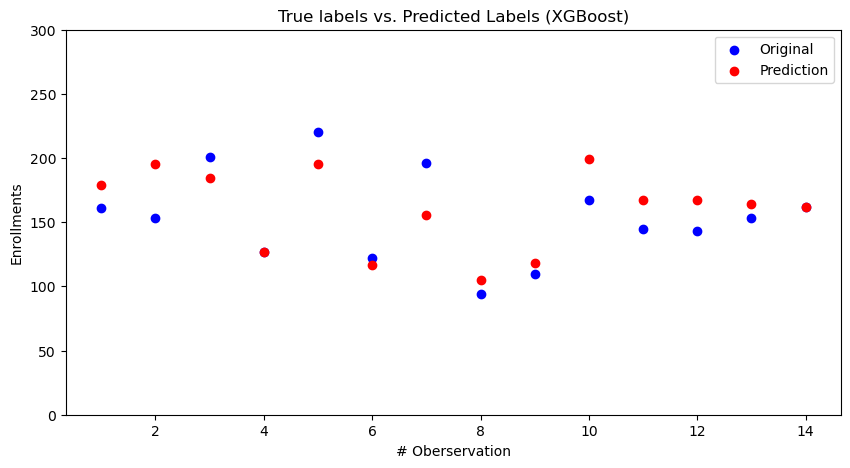

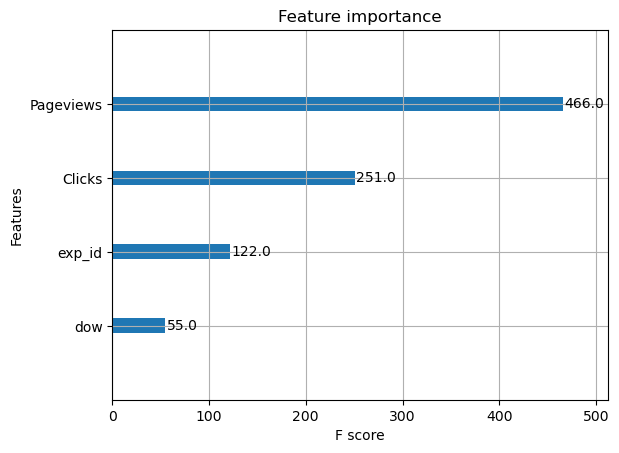

In [778]:
plot_pred(y_test, y_preds_xg, 'XGBoost')

xgb.plot_importance(model_xg);
plt.show()